In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mpg=pd.read_csv('auto-mpg.csv')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
mpg.duplicated().sum()

0

In [7]:
mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
mpg.horsepower = pd.to_numeric(mpg.horsepower,errors='coerce', downcast='integer')

In [9]:
mpg.horsepower = mpg.horsepower.fillna(mpg.horsepower.mode()[0])

In [10]:
mpg["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [11]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [14]:
mpg['origin'].unique()

array([1, 3, 2], dtype=int64)

In [15]:
mpg.loc[mpg.origin == 1, 'origin'] = 'USA'
mpg.loc[mpg.origin == 2, 'origin'] = 'Europe'
mpg.loc[mpg.origin == 3, 'origin'] = 'Asia'
mpg['origin'] = mpg['origin'].astype('category')

In [17]:
mpg['origin'].unique()

[USA, Asia, Europe]
Categories (3, object): [USA, Asia, Europe]

In [18]:
#Cars with lighter weight and good mpg and minimum 4 cylinders

mpg.loc[(mpg['weight']<2000) & (mpg['mpg']>35) & (mpg['cylinders']>=4) ,['car name']]

,car name
218,renault 5 gtl
244,volkswagen rabbit custom diesel
245,ford fiesta
248,honda civic cvcc
295,dodge colt hatchback custom
310,toyota corolla tercel
329,honda civic 1500 gl
330,renault lecar deluxe
343,toyota starlet
344,plymouth champ


In [61]:
mpg.groupby(by='car name',sort=False)['cylinders'].max()

car name
chevrolet chevelle malibu            8
buick skylark 320                    8
plymouth satellite                   8
amc rebel sst                        8
ford torino                          8
ford galaxie 500                     8
chevrolet impala                     8
plymouth fury iii                    8
pontiac catalina                     8
amc ambassador dpl                   8
dodge challenger se                  8
plymouth 'cuda 340                   8
chevrolet monte carlo                8
buick estate wagon (sw)              8
toyota corona mark ii                4
plymouth duster                      6
amc hornet                           6
ford maverick                        6
datsun pl510                         4
volkswagen 1131 deluxe sedan         4
peugeot 504                          4
audi 100 ls                          4
saab 99e                             4
bmw 2002                             4
amc gremlin                          6
ford f250       

[Text(0, 0.5, 'Num of Cars')]

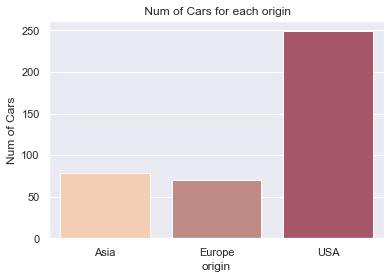

In [76]:
sns.set(style='darkgrid')
ax=sns.countplot(mpg.origin,palette=['#FFCBAB','#C7847C','#B34A5F'])
ax.set(title=" Num of Cars for each origin")
ax.set(xlabel='origin')
ax.set(ylabel='Num of Cars')

[Text(0, 0.5, 'Num of Cars')]

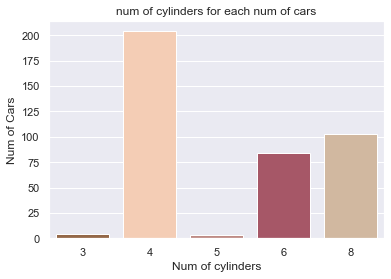

In [62]:
sns.set(style='darkgrid')
ax=sns.countplot(mpg.cylinders,palette=['#A1663B','#FFCBAB','#C7847C','#B34A5F','#D9B898'])
ax.set(title="num of cylinders for each num of cars")
ax.set(xlabel='Num of cylinders')
ax.set(ylabel='Num of Cars')

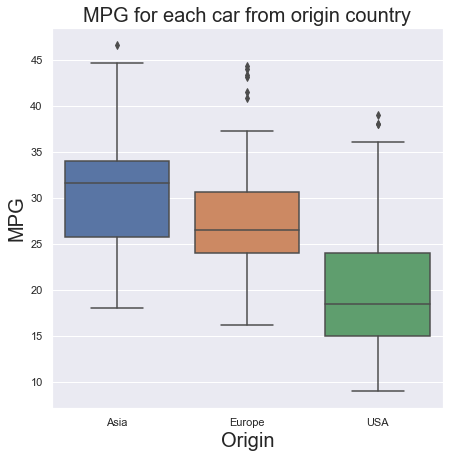

In [64]:
plt.figure(figsize=(7,7))
sns.boxplot(data=mpg, x="origin", y="mpg")
plt.title("MPG for each car from origin country", fontsize=20)
plt.xlabel("Origin", fontsize=20)
plt.ylabel("MPG", fontsize=20)
plt.show()

[Text(0, 0.5, 'MPG')]

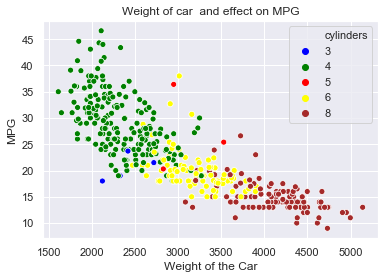

In [66]:
sns.set(style='darkgrid')
ax=sns.scatterplot(x=mpg.weight,y=mpg.mpg,hue=mpg.cylinders,palette=['blue','green','red','yellow','brown'])
ax.set(title="Weight of car  and effect on MPG")
ax.set(xlabel="Weight of the Car")
ax.set(ylabel="MPG")

[Text(0, 0.5, 'MPG')]

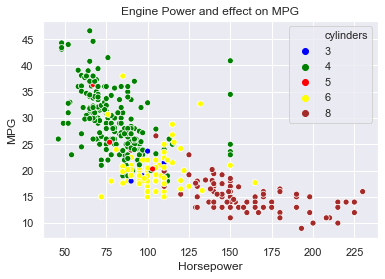

In [68]:
sns.set(style='darkgrid')
ax=sns.scatterplot(x=mpg.horsepower,y=mpg.mpg,hue=mpg.cylinders,palette=['blue','green','red','yellow','brown'])
ax.set(title="Engine Power and effect on MPG")
ax.set(xlabel="Horsepower")
ax.set(ylabel="MPG")

Text(0, 0.5, 'MPG')

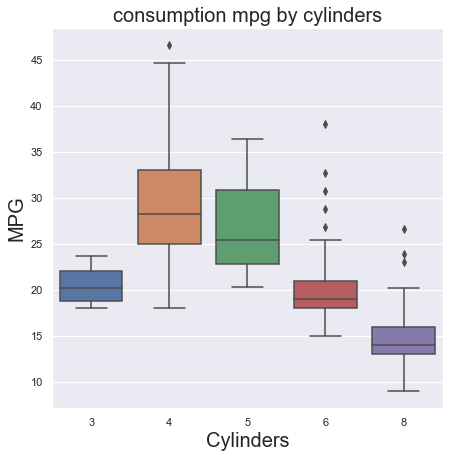

In [78]:
plt.figure(figsize=(7,7))
sns.boxplot(x = 'cylinders', y = 'mpg', data = mpg);
plt.title("consumption mpg by cylinders", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 20)
plt.ylabel("MPG", fontsize = 20)

Text(0, 0.5, 'MPG')

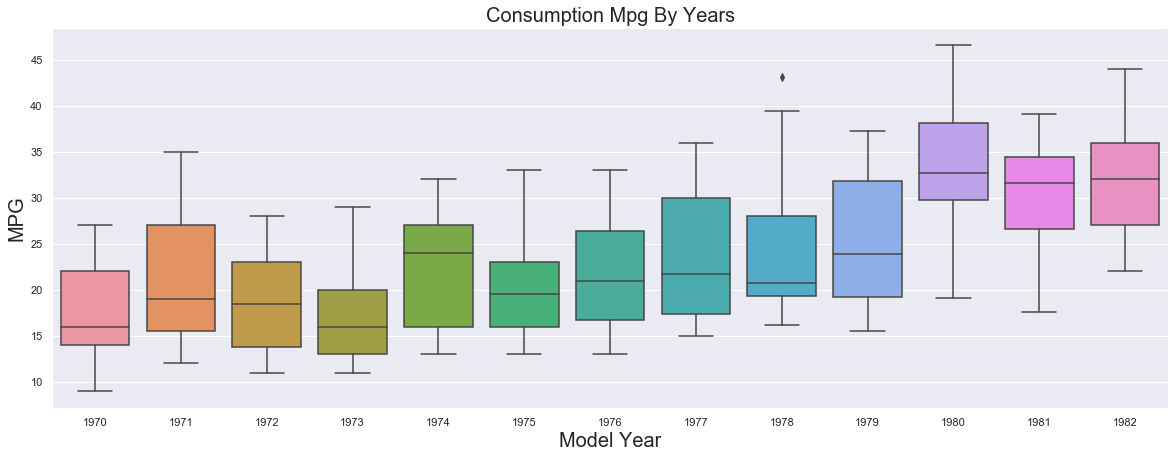

In [65]:
plt.figure(figsize=(20,7))
sns.boxplot(x =mpg['model year']+1900, y = mpg['mpg']);
plt.title("Consumption Mpg By Years", fontsize = 20)
plt.xlabel("Model Year", fontsize = 20)
plt.ylabel("MPG", fontsize = 20)

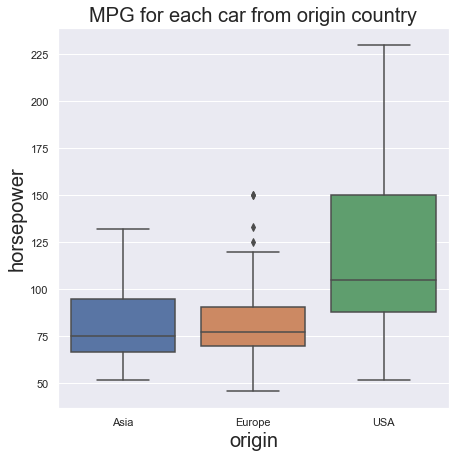

In [69]:
plt.figure(figsize=(7,7))
plt.title("MPG for each car from origin country", fontsize=20)
plt.xlabel("Origin country", fontsize=20)
plt.ylabel("horsepower", fontsize=20)
sns.boxplot(data=mpg, x="origin", y="horsepower")
plt.show()

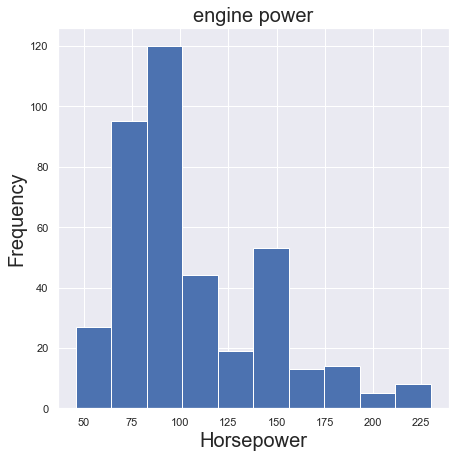

In [80]:
plt.figure(figsize=(7,7))
plt.title("engine power", fontsize=20)
plt.hist(mpg["horsepower"])
plt.xlabel("Horsepower", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.show()

Text(0, 0.5, 'Weight')

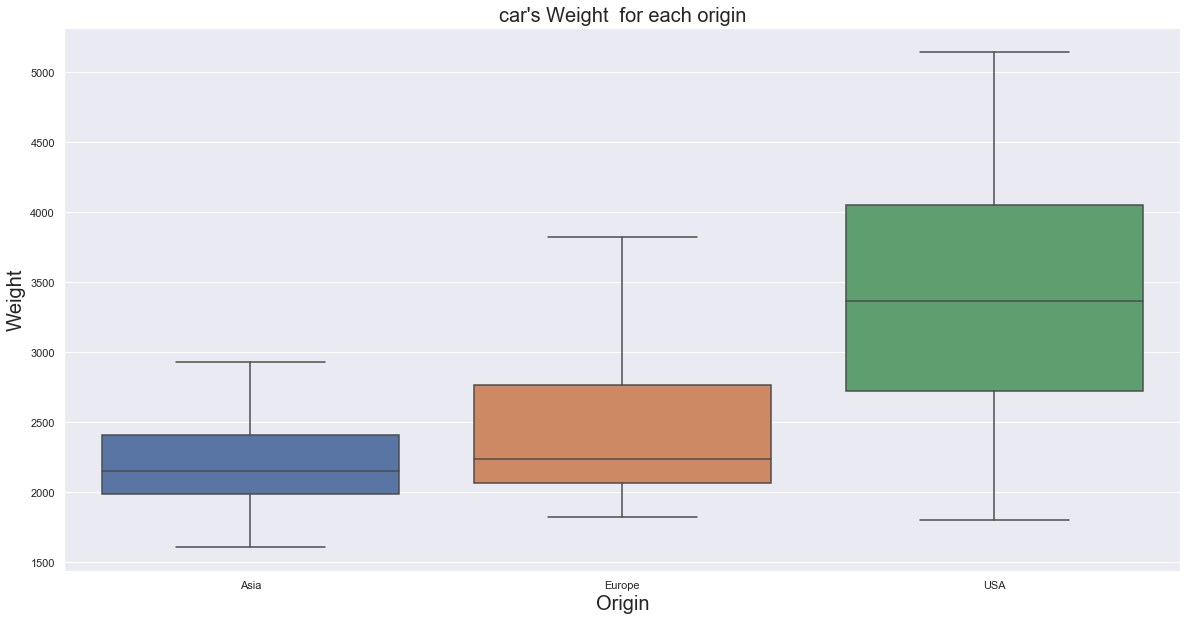

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(x ='origin', y ='weight', data = mpg);
plt.title("car's Weight  for each origin", fontsize = 20)
plt.xlabel("Origin", fontsize = 20)
plt.ylabel("Weight", fontsize = 20)

Text(0, 0.5, 'Acceleration')

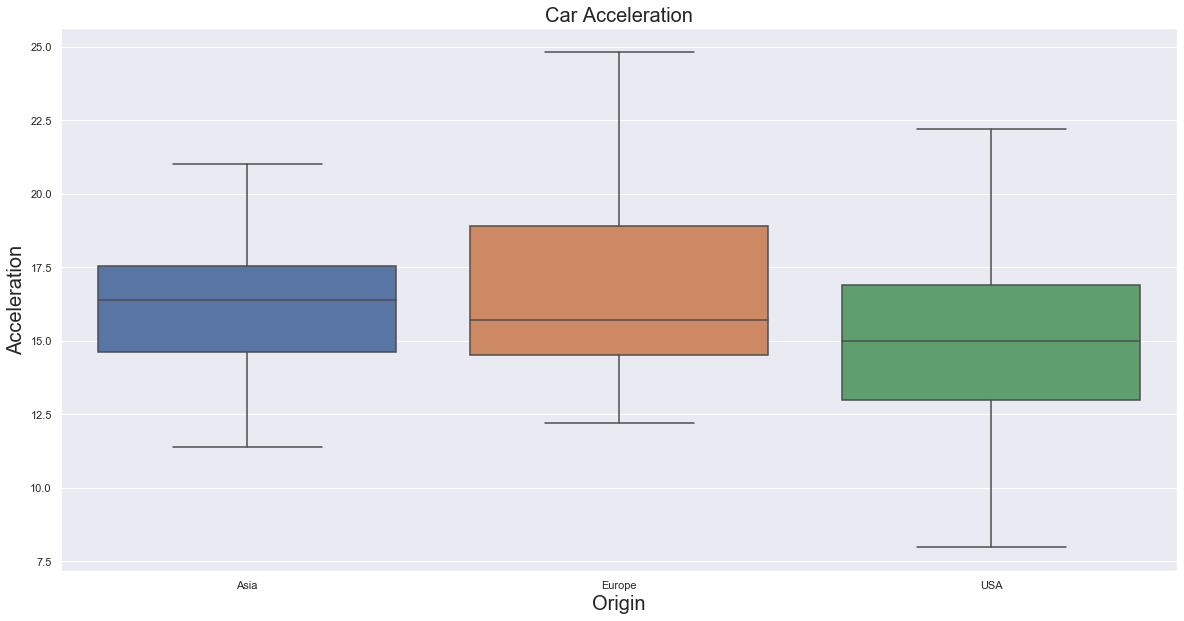

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(x ='origin', y ='acceleration', data = mpg);
plt.title("Car Acceleration", fontsize = 20)
plt.xlabel("Origin", fontsize = 20)
plt.ylabel("Acceleration", fontsize = 20)

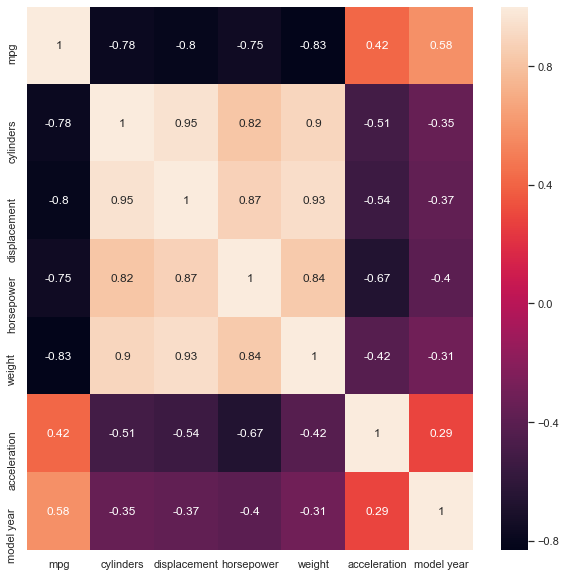

In [87]:
#create plot show correalation between features in our data
plt.figure(figsize=(10,10))
cor = mpg.corr()
sns.heatmap(cor, annot=True)
plt.show()

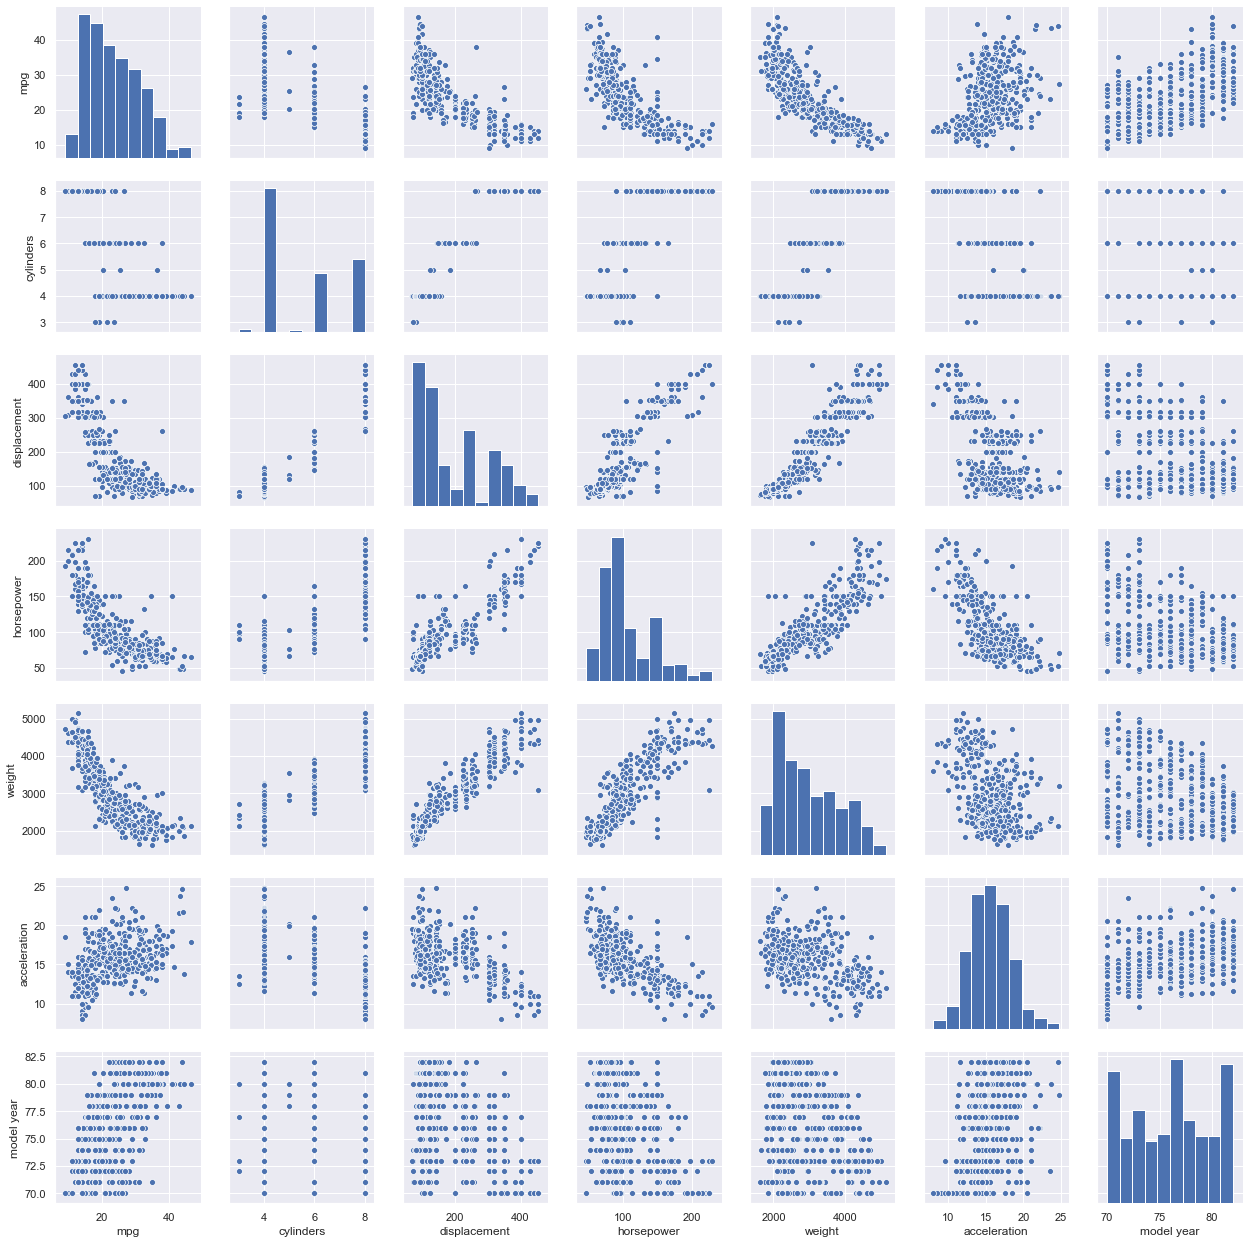

In [88]:
sns.pairplot(mpg) 
#في سؤال هنا كنت عايز اسأله 